In [62]:
import pandas as pd
import numpy as np

In [63]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [64]:
data = np.array(raw_data)

In [65]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [66]:
no_train = int(0.8*no_of_examples)
no_train

17290

In [67]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1].reshape(-1,1)

In [68]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [69]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [70]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
        
    def train(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W) + self.b      
        
        
        

In [71]:
no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
RMSE_plot = []
for i in range(no_of_epochs):
    loss = model.train(lr=0.05)
    print("Iteration "+str(i+1)+": ",loss)
    RMSE_plot.append(loss)

Iteration 0:  1.20577928338
Iteration 1:  1.0997335672
Iteration 2:  1.01868950695
Iteration 3:  0.956256654151
Iteration 4:  0.907810816219
Iteration 5:  0.869973051494
Iteration 6:  0.84024985234
Iteration 7:  0.81678304094
Iteration 8:  0.79817466934
Iteration 9:  0.78336345574
Iteration 10:  0.771536837302
Iteration 11:  0.762067798667
Iteration 12:  0.754469061007
Iteration 13:  0.748359533415
Iteration 14:  0.743439500827
Iteration 15:  0.739472093934
Iteration 16:  0.736269319665
Iteration 17:  0.733681435204
Iteration 18:  0.731588797566
Iteration 19:  0.729895563952
Iteration 20:  0.728524788805
Iteration 21:  0.727414584309
Iteration 22:  0.726515097299
Iteration 23:  0.725786117703
Iteration 24:  0.725195178867
Iteration 25:  0.724716043307
Iteration 26:  0.724327492108
Iteration 27:  0.724012354658
Iteration 28:  0.723756729355
Iteration 29:  0.723549356603
Iteration 30:  0.723381113589
Iteration 31:  0.723244606689
Iteration 32:  0.723133842313
Iteration 33:  0.72304396084

In [72]:
import matplotlib.pyplot as plt

Text(0,0.5,'Mean Squared Error')

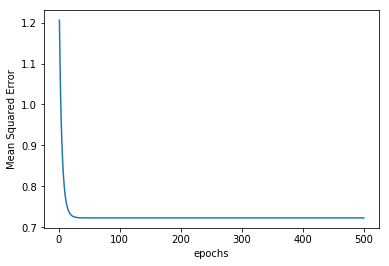

In [73]:
%matplotlib inline
plt.plot(1+np.array(range(no_of_epochs)),RMSE_plot)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")

In [74]:
regs = [0,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.8,1.0,2.0,5.0]

In [75]:
loss_reg_train = []
loss_reg_test = []
model_params = {}
no_of_epochs = 500
for r in regs:
    model = Linear_model(no_of_features,X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train(lr = 0.05,reg = r)
    loss_reg_train.append(loss)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    loss_reg_test.append(test_loss)
    model_params[r] = (model.W,model.b)
    
for i in range(len(regs)):
    print("Regularisation: "+str(regs[i])+", Test Loss: \t",loss_reg_test[i])

Regularisation: 0, Test Loss: 	 314935.642714
Regularisation: 0.001, Test Loss: 	 314941.725343
Regularisation: 0.005, Test Loss: 	 314967.182511
Regularisation: 0.01, Test Loss: 	 315001.410812
Regularisation: 0.02, Test Loss: 	 315077.138647
Regularisation: 0.05, Test Loss: 	 315350.73341
Regularisation: 0.1, Test Loss: 	 315906.238391
Regularisation: 0.2, Test Loss: 	 317172.609775
Regularisation: 0.3, Test Loss: 	 318483.550449
Regularisation: 0.5, Test Loss: 	 321031.844875
Regularisation: 0.8, Test Loss: 	 324561.840042
Regularisation: 1.0, Test Loss: 	 326720.368724
Regularisation: 2.0, Test Loss: 	 335473.810203
Regularisation: 5.0, Test Loss: 	 349480.091713


Text(0,0.5,'Mean Squared error (Train)')

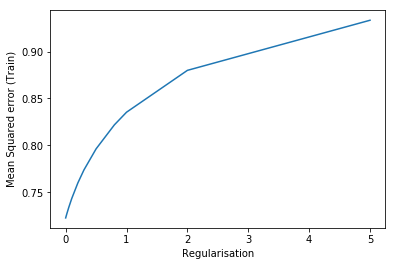

In [76]:
plt.plot(regs,loss_reg_train)
plt.xlabel("Regularisation")
plt.ylabel("Mean Squared error (Train)")

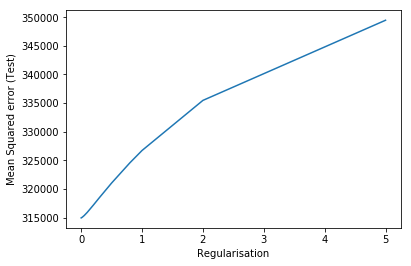

In [77]:
plt.plot(regs,loss_reg_test)
plt.xlabel("Regularisation")
plt.ylabel("Mean Squared error (Test)")
plt.savefig("1a_TestRMSEvsReg.png")

In [79]:
for (key,val) in model_params.items():
    print("Regularisation: ",key)
    print("W: ",val[0].T)
    print("B: ",val[1])
    print()

Regularisation:  0
W:  [[ 0.04288975  0.02805758  0.04467961  0.48165961]]
B:  1.38163370597e-16

Regularisation:  0.001
W:  [[ 0.04290763  0.02836742  0.04498156  0.48086435]]
B:  1.38296931262e-16

Regularisation:  0.005
W:  [[ 0.04297637  0.02958632  0.04616856  0.47772039]]
B:  1.38430491926e-16

Regularisation:  0.01
W:  [[ 0.04305619  0.03106528  0.0476068   0.47387169]]
B:  1.38183918392e-16

Regularisation:  0.02
W:  [[ 0.04319669  0.03388175  0.05033936  0.46643235]]
B:  1.39036651866e-16

Regularisation:  0.05
W:  [[ 0.04348464  0.04132523  0.05751546  0.44596415]]
B:  1.38574326488e-16

Regularisation:  0.1
W:  [[ 0.04362235  0.05104476  0.06675833  0.41687315]]
B:  1.37772962501e-16

Regularisation:  0.2
W:  [[ 0.0431146   0.06373317  0.07847004  0.37178893]]
B:  1.25064151567e-16

Regularisation:  0.3
W:  [[ 0.04207433  0.0709786   0.08478586  0.33794235]]
B:  1.25033329876e-16

Regularisation:  0.5
W:  [[ 0.03946667  0.07726215  0.08944991  0.28933279]]
B:  1.25320998999e